# Laboratorio 01
#### Manuel Rodas 21509



### Ejercicio 1

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA

# Cargar los datos
df = pd.read_csv("risk_factors_cervical_cancer.csv")

In [32]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Age                                 858 non-null    int64 
 1   Number of sexual partners           858 non-null    object
 2   First sexual intercourse            858 non-null    object
 3   Num of pregnancies                  858 non-null    object
 4   Smokes                              858 non-null    object
 5   Smokes (years)                      858 non-null    object
 6   Smokes (packs/year)                 858 non-null    object
 7   Hormonal Contraceptives             858 non-null    object
 8   Hormonal Contraceptives (years)     858 non-null    object
 9   IUD                                 858 non-null    object
 10  IUD (years)                         858 non-null    object
 11  STDs                                858 non-null    object

In [33]:
print(df.describe())

              Age  STDs: Number of diagnosis   Dx:Cancer      Dx:CIN  \
count  858.000000                 858.000000  858.000000  858.000000   
mean    26.820513                   0.087413    0.020979    0.010490   
std      8.497948                   0.302545    0.143398    0.101939   
min     13.000000                   0.000000    0.000000    0.000000   
25%     20.000000                   0.000000    0.000000    0.000000   
50%     25.000000                   0.000000    0.000000    0.000000   
75%     32.000000                   0.000000    0.000000    0.000000   
max     84.000000                   3.000000    1.000000    1.000000   

           Dx:HPV          Dx  Hinselmann    Schiller    Citology      Biopsy  
count  858.000000  858.000000  858.000000  858.000000  858.000000  858.000000  
mean     0.020979    0.027972    0.040793    0.086247    0.051282    0.064103  
std      0.143398    0.164989    0.197925    0.280892    0.220701    0.245078  
min      0.000000    0.000000  

### Ejercicio 2

In [34]:
def classify_variable(series):
    if series.dtype == 'object' or series.dtype == 'bool':
        return 'Cualitativa (categórica)'
    elif series.dtype in ['int64', 'int32']:
        if len(series.unique()) < 10:  # Heurística para variables discretas
            return 'Cualitativa (categórica)'
        else:
            return 'Cuantitativa discreta'
    elif series.dtype in ['float64', 'float32']:
        if series.apply(lambda x: x.is_integer()).all():
            return 'Cuantitativa discreta'
        else:
            return 'Cuantitativa continua'
    else:
        return 'Tipo desconocido'

# Clasificar cada variable
variable_types = {col: classify_variable(df[col]) for col in df.columns}

# Imprimir los resultados
for variable, var_type in variable_types.items():
    print(f"{variable}: {var_type}")

Age: Cuantitativa discreta
Number of sexual partners: Cualitativa (categórica)
First sexual intercourse: Cualitativa (categórica)
Num of pregnancies: Cualitativa (categórica)
Smokes: Cualitativa (categórica)
Smokes (years): Cualitativa (categórica)
Smokes (packs/year): Cualitativa (categórica)
Hormonal Contraceptives: Cualitativa (categórica)
Hormonal Contraceptives (years): Cualitativa (categórica)
IUD: Cualitativa (categórica)
IUD (years): Cualitativa (categórica)
STDs: Cualitativa (categórica)
STDs (number): Cualitativa (categórica)
STDs:condylomatosis: Cualitativa (categórica)
STDs:cervical condylomatosis: Cualitativa (categórica)
STDs:vaginal condylomatosis: Cualitativa (categórica)
STDs:vulvo-perineal condylomatosis: Cualitativa (categórica)
STDs:syphilis: Cualitativa (categórica)
STDs:pelvic inflammatory disease: Cualitativa (categórica)
STDs:genital herpes: Cualitativa (categórica)
STDs:molluscum contagiosum: Cualitativa (categórica)
STDs:AIDS: Cualitativa (categórica)
STDs:HIV

### Limpieza de datos

In [35]:
# Reemplazar '?' con NaN
df = df.replace('?', np.nan)

# Calcular el porcentaje de valores faltantes en cada columna
missing_percentages = df.isnull().mean() * 100

# Eliminar columnas con más del 50% de valores faltantes
columns_to_drop = missing_percentages[missing_percentages > 50].index
df = df.drop(columns=columns_to_drop)

print(f"Columnas eliminadas: {list(columns_to_drop)}")

Columnas eliminadas: ['STDs: Time since first diagnosis', 'STDs: Time since last diagnosis']


### Ejercicio 3

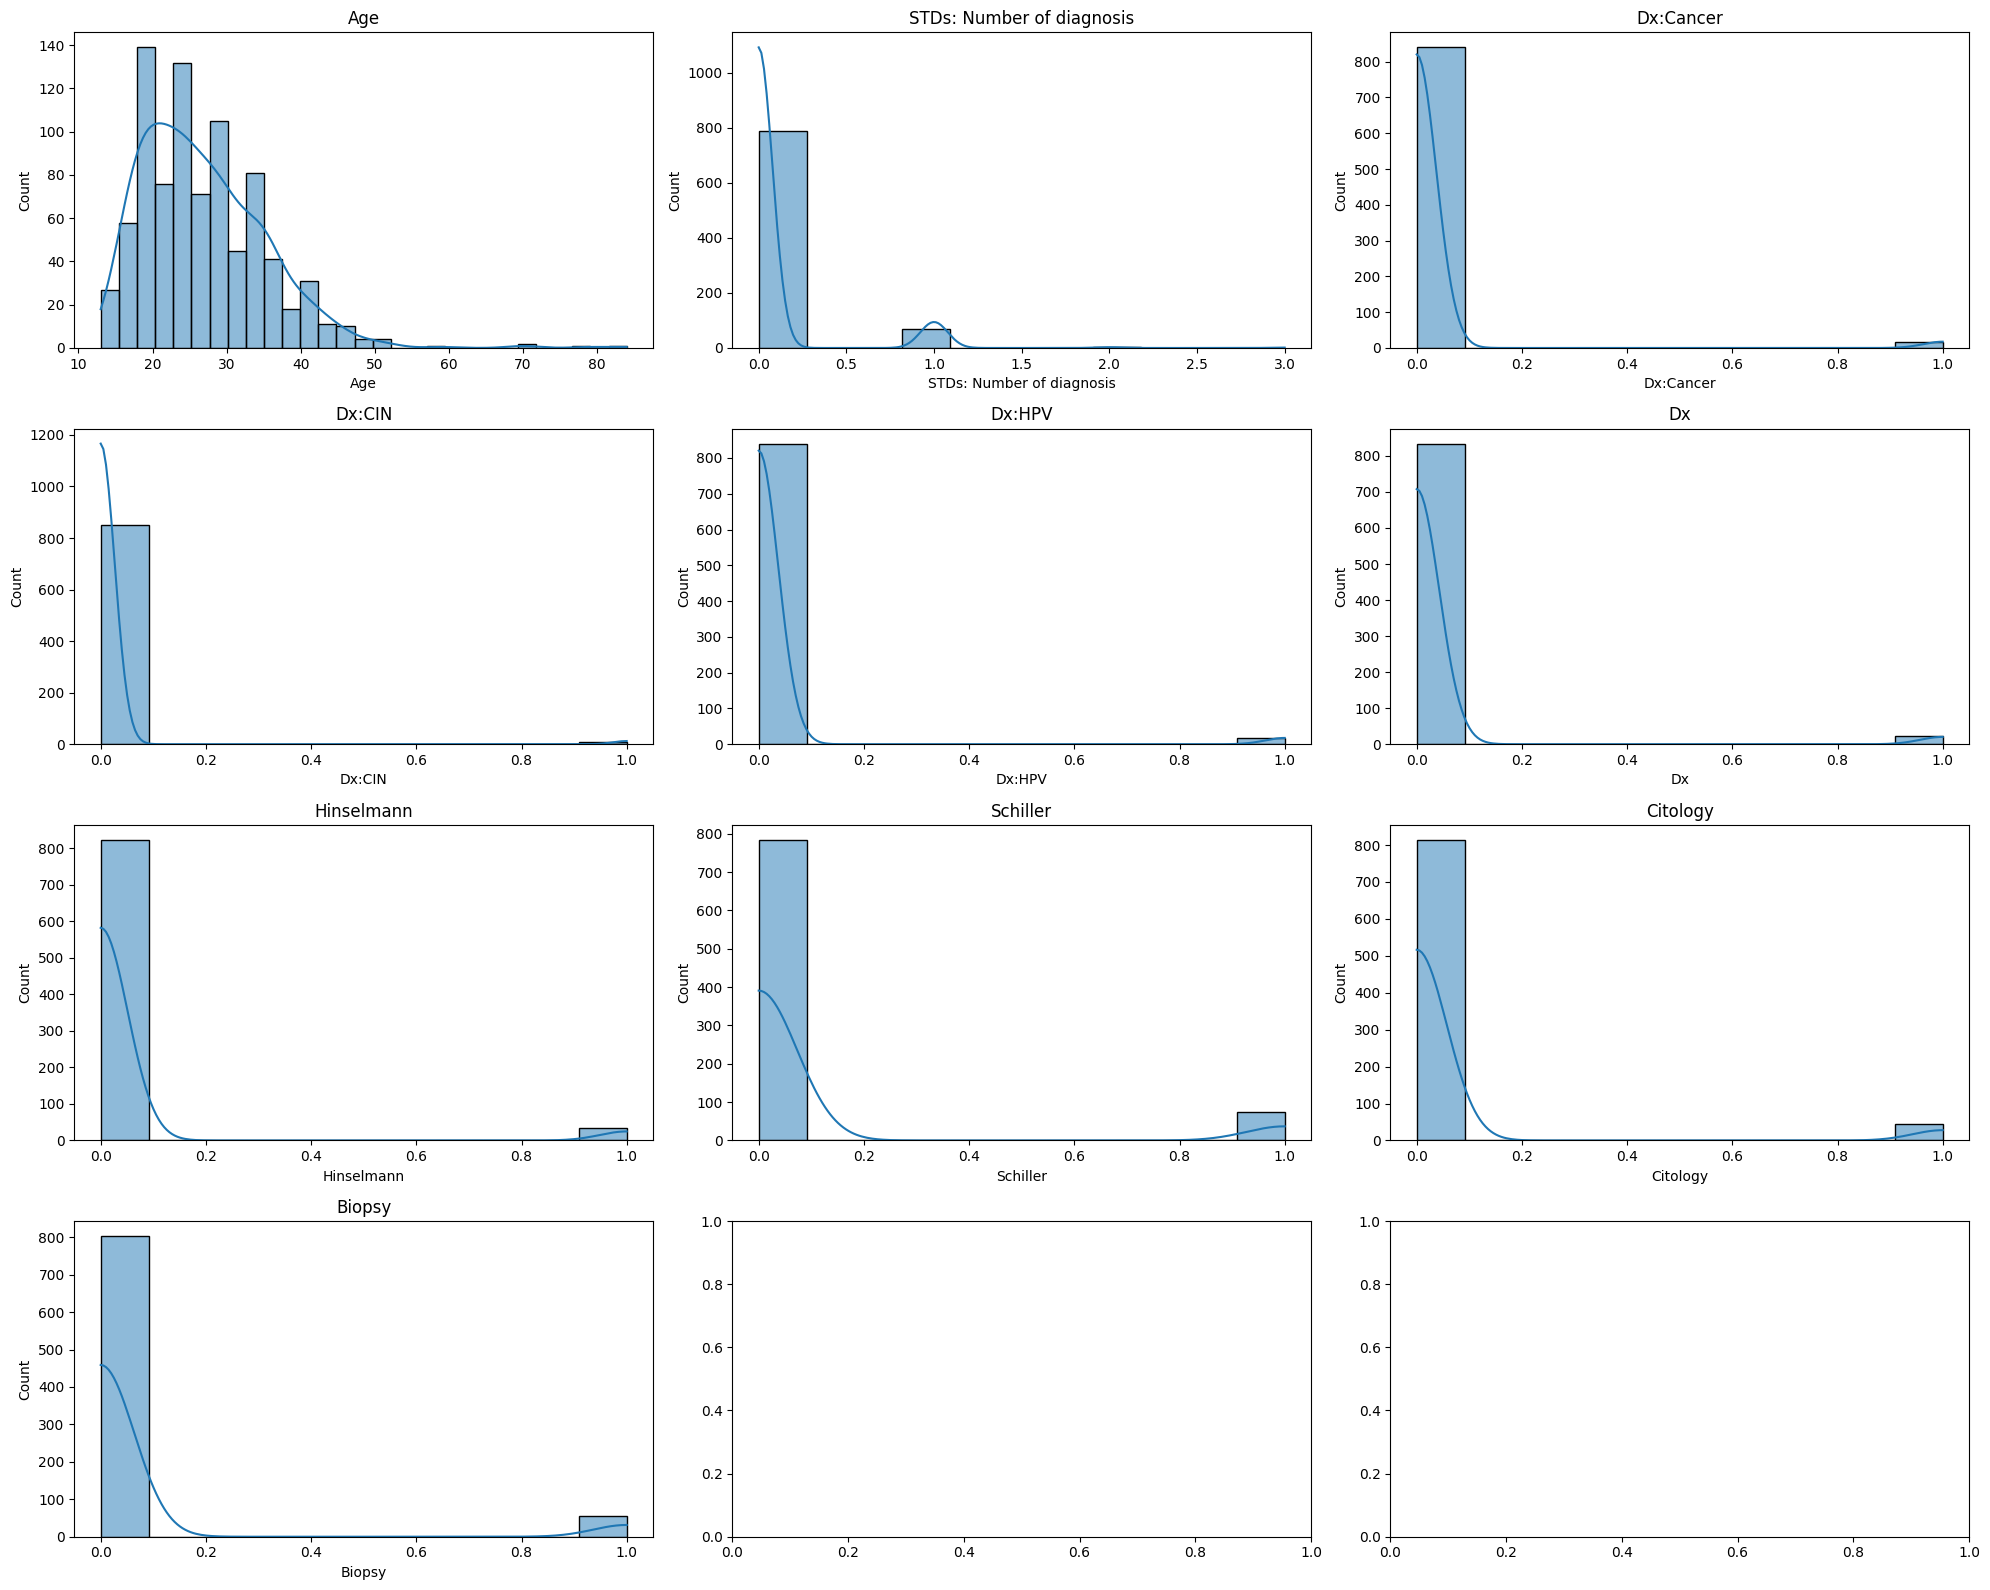

In [36]:
numeric_columns = df.select_dtypes(include=[np.number]).columns
fig, axes = plt.subplots(nrows=len(numeric_columns)//3 + 1, ncols=3, figsize=(20, 5*len(numeric_columns)//3))
for i, column in enumerate(numeric_columns):
    sns.histplot(df[column].dropna(), ax=axes[i//3, i%3], kde=True)
    axes[i//3, i%3].set_title(column)
plt.tight_layout()
plt.show()

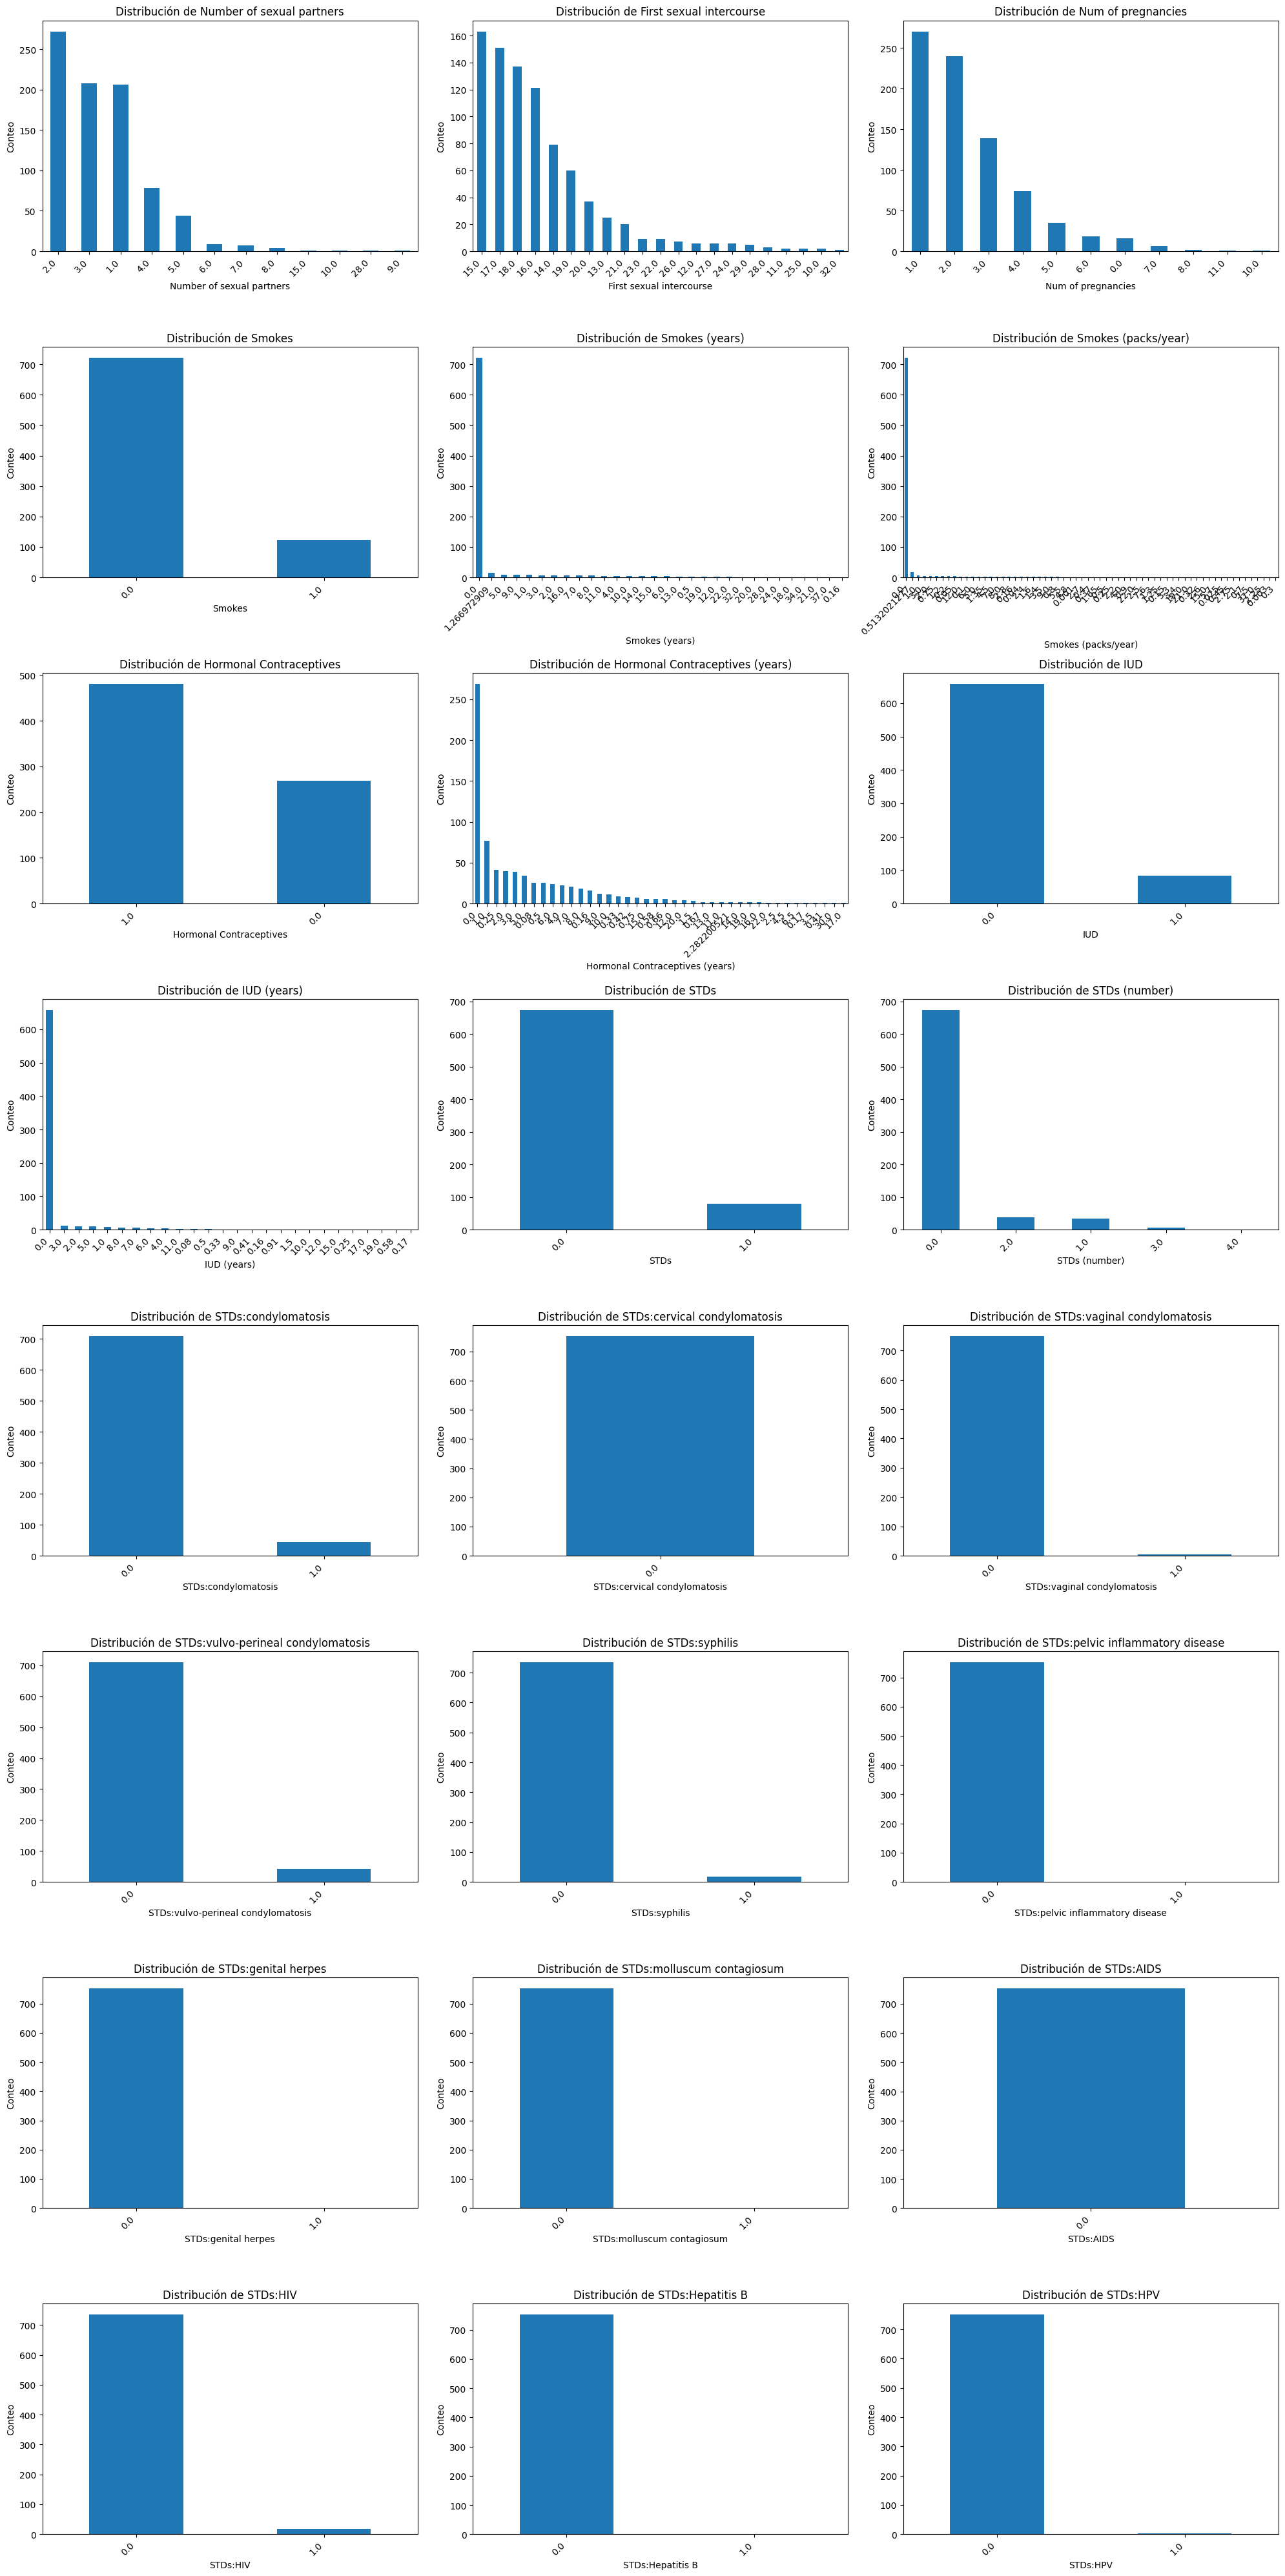

In [37]:
categorical_columns = df.select_dtypes(include=['object', 'bool', 'category']).columns

# Calcular el número de filas y columnas para el subplot
n_cols = 3
n_rows = (len(categorical_columns) - 1) // n_cols + 1

# Crear el subplot
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(20, 5*n_rows))

# Aplanar el array de ejes si es necesario
if n_rows > 1:
    axes = axes.flatten()

# Iterar sobre las columnas categóricas y crear los gráficos
for i, column in enumerate(categorical_columns):
    if i < len(axes):  # Asegurarse de que no excedemos el número de subplots
        df[column].value_counts().plot(kind='bar', ax=axes[i])
        axes[i].set_title(f'Distribución de {column}')
        axes[i].set_ylabel('Conteo')
        axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha='right')

# Eliminar los subplots vacíos si los hay
for i in range(len(categorical_columns), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

### Ejercicio 4

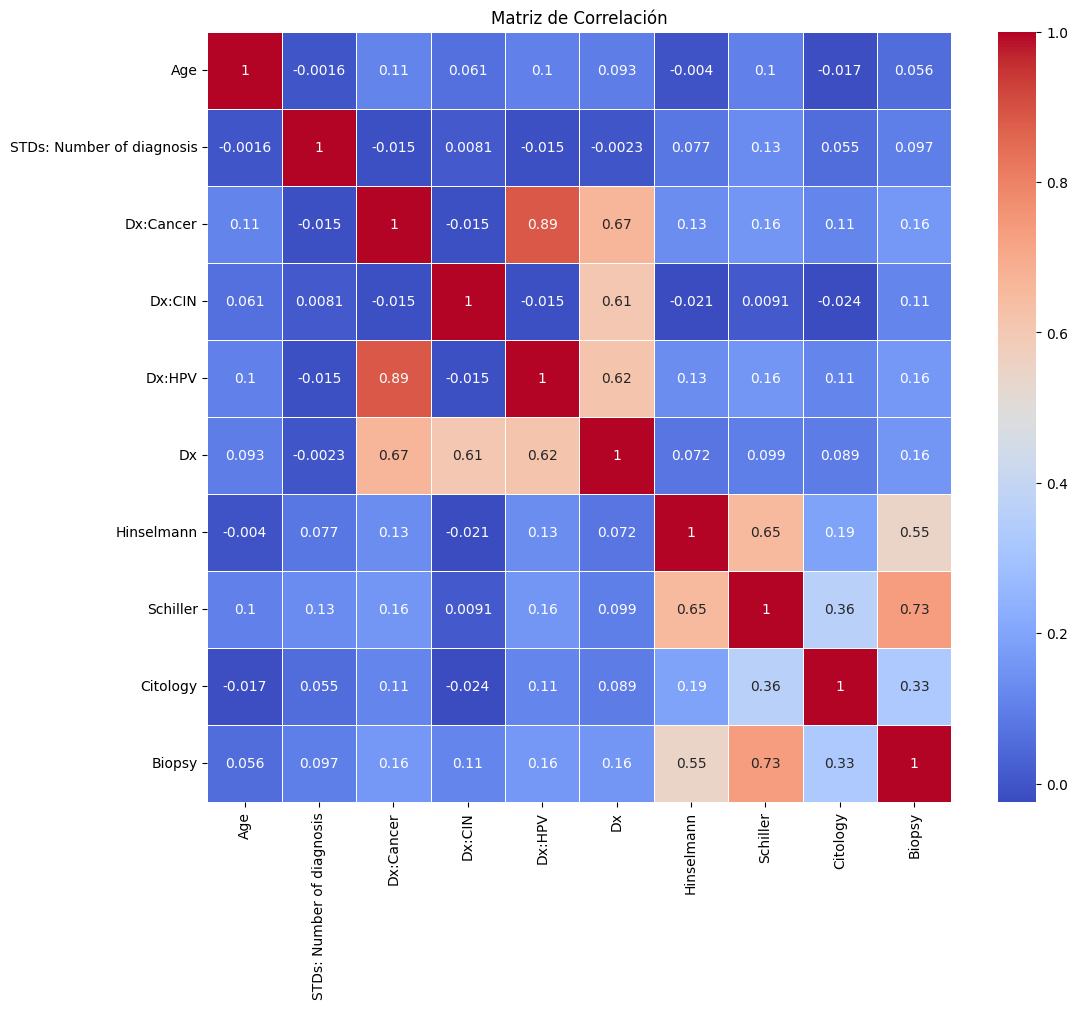

In [38]:
corr = df[numeric_columns].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()

### Ejercicio 5


Tabla de Frecuencia y Proporción para Number of sexual partners:
                           Frecuencia Proporción
Number of sexual partners                       
2.0                               272     32.69%
3.0                               208     25.00%
1.0                               206     24.76%
4.0                                78      9.38%
5.0                                44      5.29%
6.0                                 9      1.08%
7.0                                 7      0.84%
8.0                                 4      0.48%
15.0                                1      0.12%
10.0                                1      0.12%
28.0                                1      0.12%
9.0                                 1      0.12%

Tabla de Frecuencia y Proporción para First sexual intercourse:
                          Frecuencia Proporción
First sexual intercourse                       
15.0                             163     19.15%
17.0                             151   

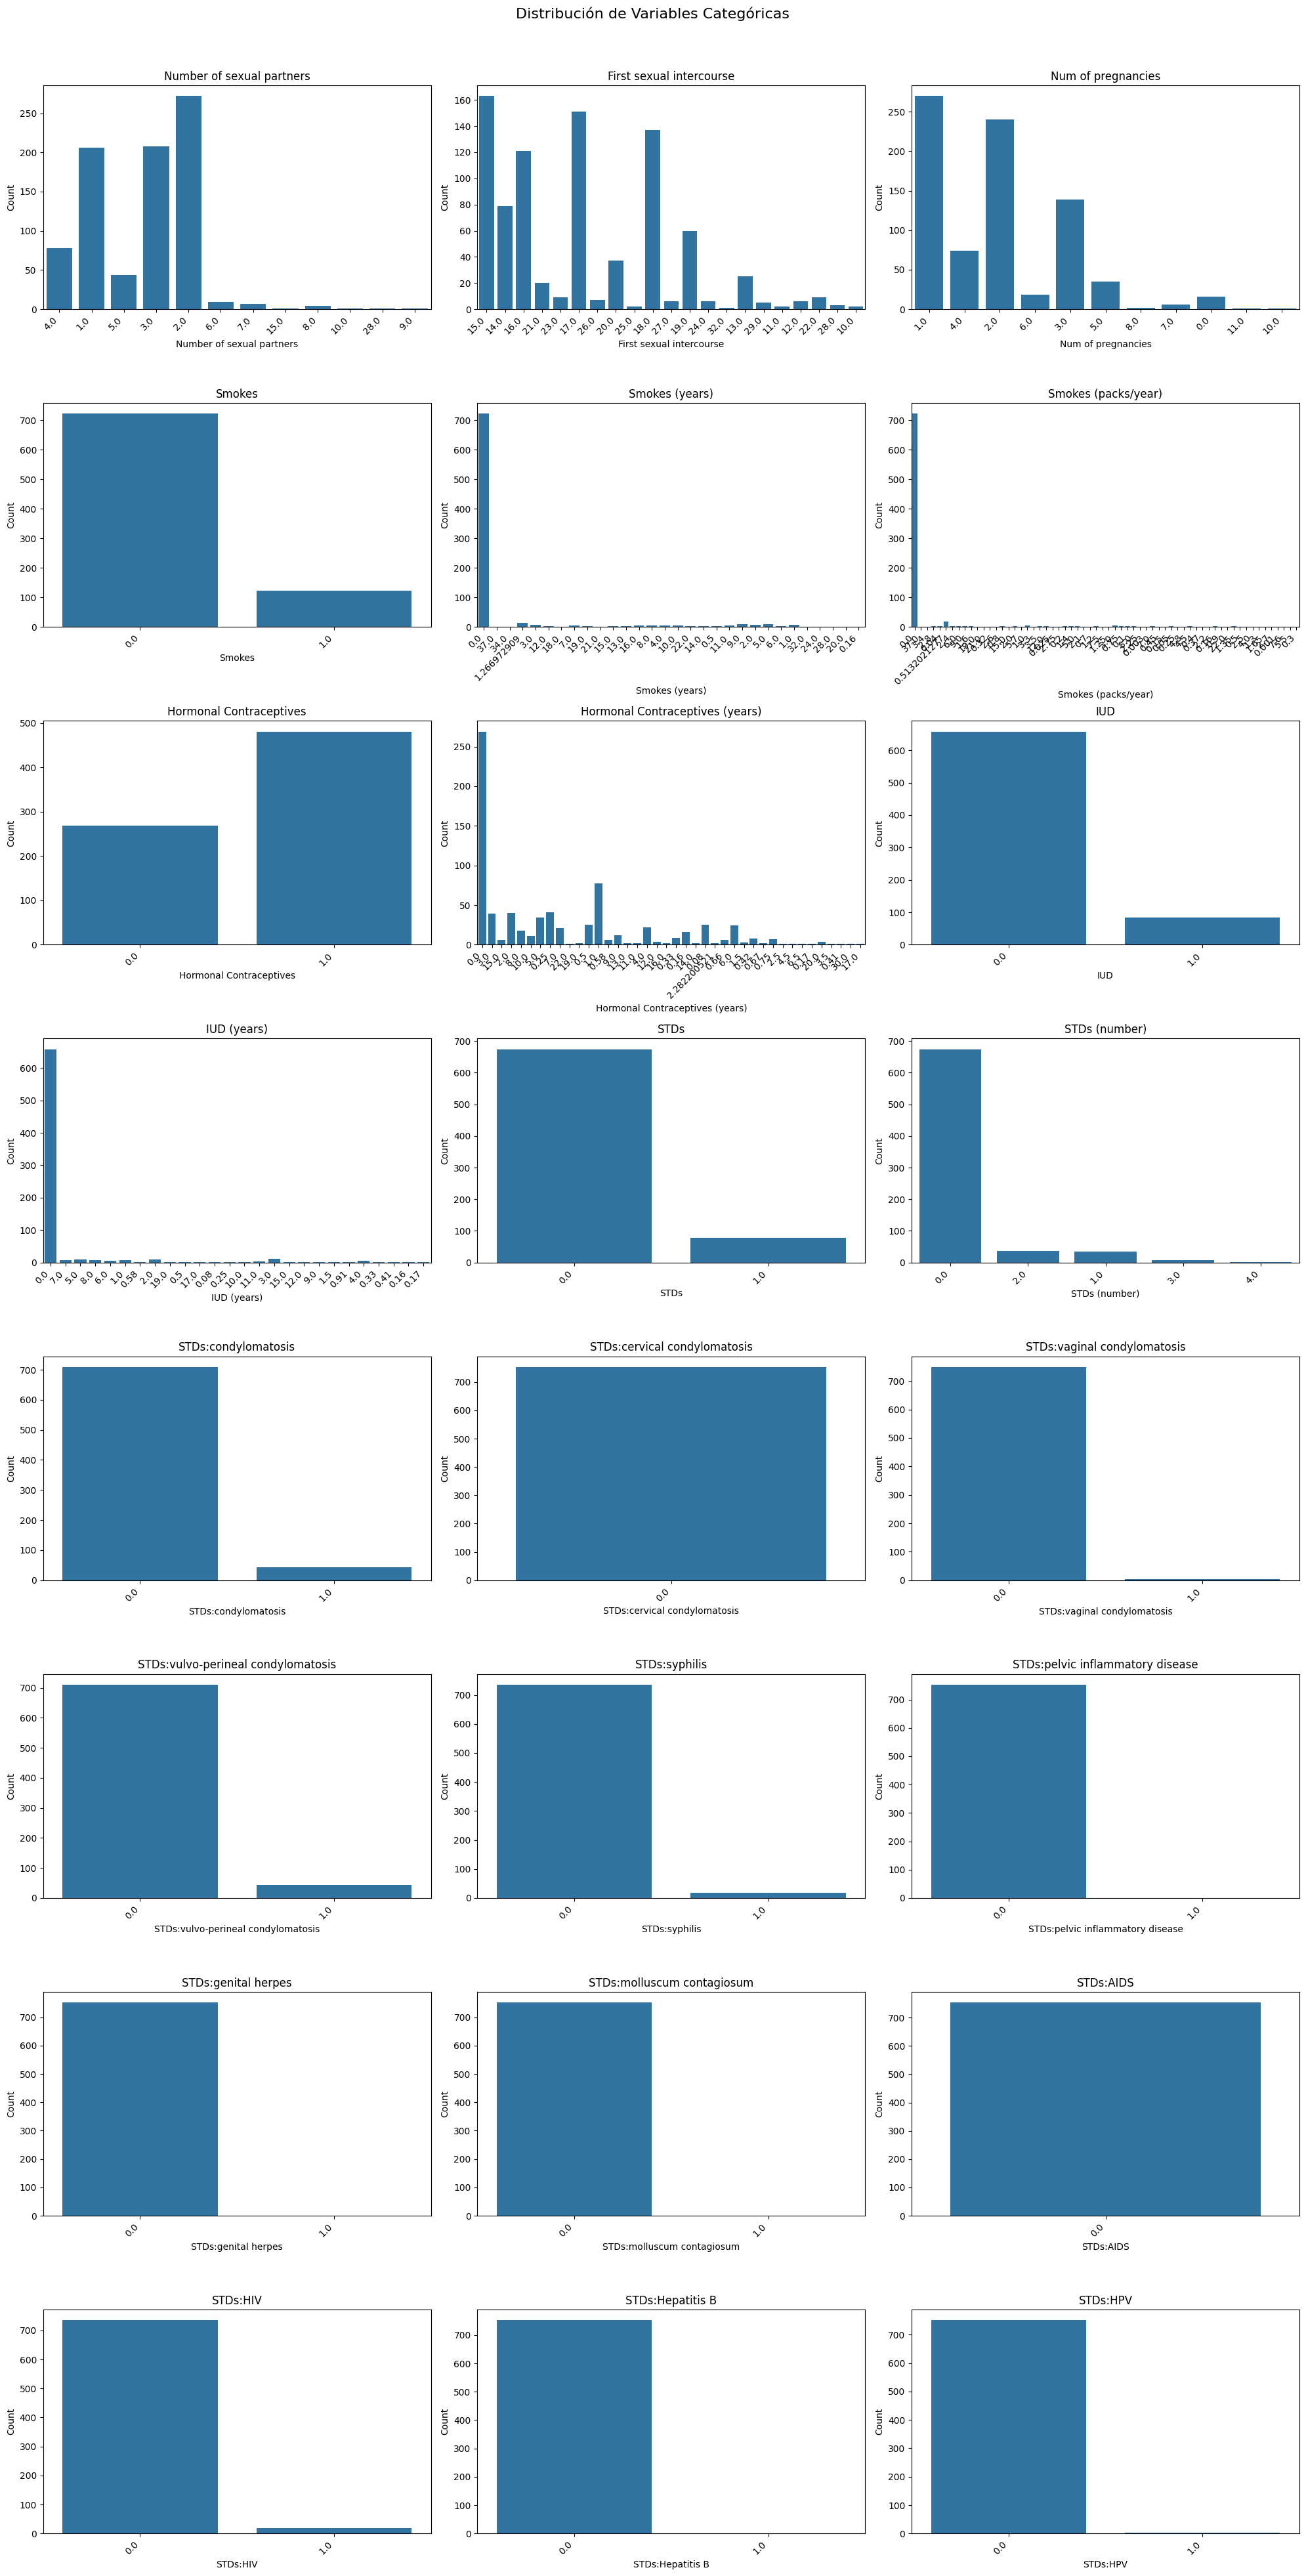

In [39]:
categorical_columns = df.select_dtypes(include=['object', 'bool']).columns

def freq_prop_table(df, column):
    freq = df[column].value_counts()
    prop = df[column].value_counts(normalize=True)
    table = pd.concat([freq, prop], axis=1, keys=['Frecuencia', 'Proporción'])
    table['Proporción'] = table['Proporción'].map('{:.2%}'.format)
    return table

for column in categorical_columns:
    print(f"\nTabla de Frecuencia y Proporción para {column}:")
    table = freq_prop_table(df, column)
    print(table)

n_cols = 3
n_rows = (len(categorical_columns) - 1) // n_cols + 1
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5*n_rows))
fig.suptitle('Distribución de Variables Categóricas', fontsize=16)

for i, column in enumerate(categorical_columns):
    row = i // n_cols
    col = i % n_cols
    ax = axes[row, col] if n_rows > 1 else axes[col]
    
    sns.countplot(x=column, data=df, ax=ax)
    ax.set_title(column)
    ax.set_ylabel('Count')
    
    # Rotar las etiquetas después de que el gráfico se haya dibujado
    plt.setp(ax.get_xticklabels(), rotation=45, ha='right')

# Eliminar subplots vacíos
for i in range(len(categorical_columns), n_rows * n_cols):
    row = i // n_cols
    col = i % n_cols
    fig.delaxes(axes[row, col] if n_rows > 1 else axes[col])

plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()

### Ejercicio 7

In [40]:
for col in categorical_columns:
    print(f"{col}: {df[col].nunique()} categorías únicas")

Number of sexual partners: 12 categorías únicas
First sexual intercourse: 21 categorías únicas
Num of pregnancies: 11 categorías únicas
Smokes: 2 categorías únicas
Smokes (years): 30 categorías únicas
Smokes (packs/year): 62 categorías únicas
Hormonal Contraceptives: 2 categorías únicas
Hormonal Contraceptives (years): 40 categorías únicas
IUD: 2 categorías únicas
IUD (years): 26 categorías únicas
STDs: 2 categorías únicas
STDs (number): 5 categorías únicas
STDs:condylomatosis: 2 categorías únicas
STDs:cervical condylomatosis: 1 categorías únicas
STDs:vaginal condylomatosis: 2 categorías únicas
STDs:vulvo-perineal condylomatosis: 2 categorías únicas
STDs:syphilis: 2 categorías únicas
STDs:pelvic inflammatory disease: 2 categorías únicas
STDs:genital herpes: 2 categorías únicas
STDs:molluscum contagiosum: 2 categorías únicas
STDs:AIDS: 1 categorías únicas
STDs:HIV: 2 categorías únicas
STDs:Hepatitis B: 2 categorías únicas
STDs:HPV: 2 categorías únicas


In [41]:
for col in categorical_columns:
    print(f"\nDistribución de {col}:")
    print(df[col].value_counts(normalize=True))


Distribución de Number of sexual partners:
Number of sexual partners
2.0     0.326923
3.0     0.250000
1.0     0.247596
4.0     0.093750
5.0     0.052885
6.0     0.010817
7.0     0.008413
8.0     0.004808
15.0    0.001202
10.0    0.001202
28.0    0.001202
9.0     0.001202
Name: proportion, dtype: float64

Distribución de First sexual intercourse:
First sexual intercourse
15.0    0.191539
17.0    0.177438
18.0    0.160987
16.0    0.142186
14.0    0.092832
19.0    0.070505
20.0    0.043478
13.0    0.029377
21.0    0.023502
23.0    0.010576
22.0    0.010576
26.0    0.008226
12.0    0.007051
27.0    0.007051
24.0    0.007051
29.0    0.005875
28.0    0.003525
11.0    0.002350
25.0    0.002350
10.0    0.002350
32.0    0.001175
Name: proportion, dtype: float64

Distribución de Num of pregnancies:
Num of pregnancies
1.0     0.336658
2.0     0.299252
3.0     0.173317
4.0     0.092269
5.0     0.043641
6.0     0.022444
0.0     0.019950
7.0     0.007481
8.0     0.002494
11.0    0.001247
10.0    0

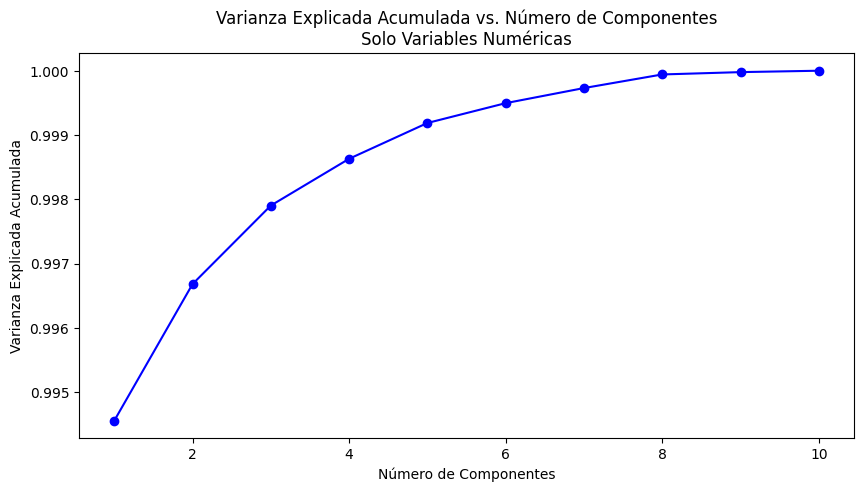


Solo Variables Numéricas:
Número de componentes para explicar el 95% de la varianza: 1
Dimensionalidad original del dataset: 10


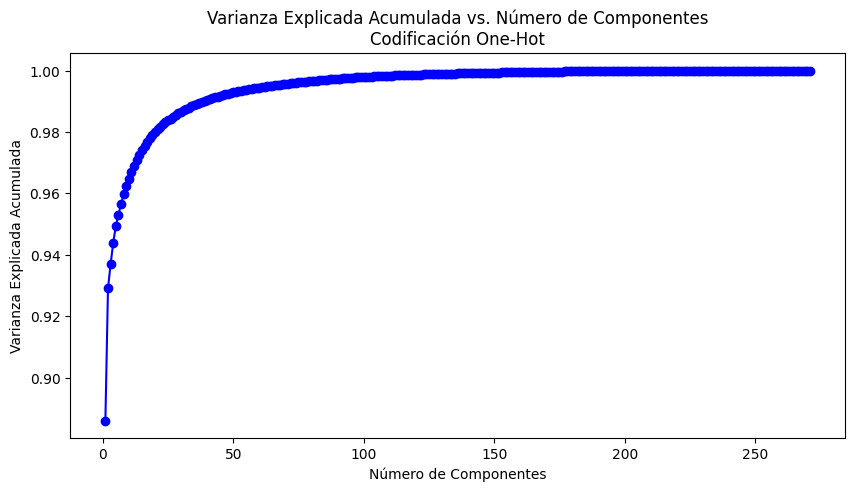


Codificación One-Hot:
Número de componentes para explicar el 95% de la varianza: 6
Dimensionalidad original del dataset: 271


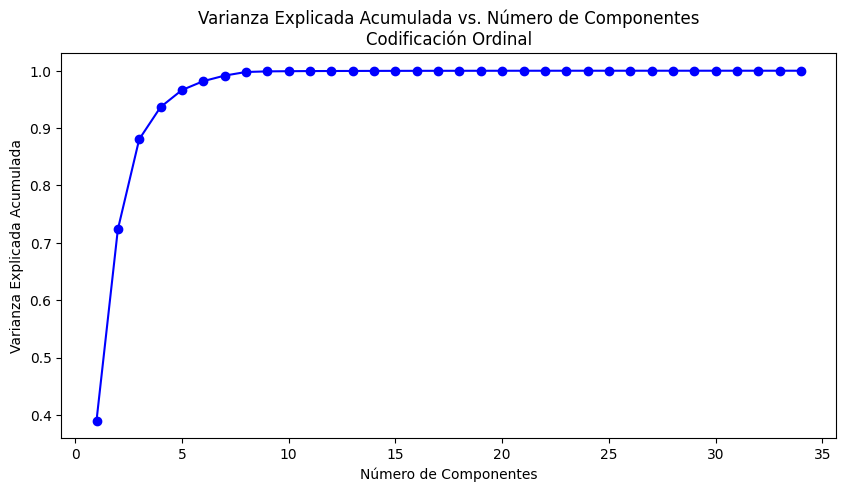


Codificación Ordinal:
Número de componentes para explicar el 95% de la varianza: 5
Dimensionalidad original del dataset: 34


In [42]:
def apply_one_hot_encoding(df, categorical_columns):
    encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
    encoded = encoder.fit_transform(df[categorical_columns])
    encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(categorical_columns))
    return pd.concat([df.drop(columns=categorical_columns), encoded_df], axis=1)

def apply_ordinal_encoding(df, categorical_columns):
    encoder = OrdinalEncoder()
    df[categorical_columns] = encoder.fit_transform(df[categorical_columns])
    return df

df_one_hot = apply_one_hot_encoding(df, categorical_columns)
df_ordinal = apply_ordinal_encoding(df.copy(), categorical_columns)

imputer = SimpleImputer(strategy='mean')
df_one_hot_imputed = pd.DataFrame(imputer.fit_transform(df_one_hot), columns=df_one_hot.columns)
df_ordinal_imputed = pd.DataFrame(imputer.fit_transform(df_ordinal), columns=df_ordinal.columns)

def perform_pca(df, title):
    pca = PCA()
    pca_result = pca.fit_transform(df)    
    cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
    
    plt.figure(figsize=(10, 5))
    plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, 'bo-')
    plt.xlabel('Número de Componentes')
    plt.ylabel('Varianza Explicada Acumulada')
    plt.title(f'Varianza Explicada Acumulada vs. Número de Componentes\n{title}')
    plt.show()
    
    n_components_95 = np.argmax(cumulative_variance_ratio >= 0.95) + 1
    print(f"\n{title}:")
    print(f"Número de componentes para explicar el 95% de la varianza: {n_components_95}")
    print(f"Dimensionalidad original del dataset: {df.shape[1]}")

perform_pca(df[numeric_columns], "Solo Variables Numéricas")
perform_pca(df_one_hot_imputed, "Codificación One-Hot")
perform_pca(df_ordinal_imputed, "Codificación Ordinal")